In [ ]:
# Stanford Datathon
# Team 205
# Arnav Ascheti, Janavi Kasera, William Cooper 
# Concentration & Nutrition 

In [ ]:
# imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import altair as alt 
from scipy.stats import linregress


In [ ]:
# class to analyze & plot college food data 

class Analysis(): 
  def __init__(self, file_path): 
    self.file_path = file_path
    self.df = self.extract_data_to_df(self.file_path)


  # Extract data from csv into pandas df 
  def extract_data_to_df(self, file_path): 
    df = pd.read_csv(file_path)
    return df 


  # print line break 
  def line_break(self):
    print("-"*100)


  # to help discover what independent variables to look at 
  def print_df_columns(self): 
    for col in self.df.columns: 
      print(col)


  # clean the data (get rid of strings, nans)
  def clean_data(self):
    # from Kaggle
    df = self.df 
    cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

    df['calories_day'].fillna(1,inplace=True)
    df['comfort_food_reasons_coded'].fillna(9,inplace=True)
    df['cuisine'].fillna(6,inplace=True)
    df['employment'].fillna(4,inplace=True)
    df['exercise'].fillna(5,inplace=True)
    df['type_sports'].fillna('Nothing',inplace=True)

    for i in cols_with_missing:
     df = df[~df[i].isnull()]


    df.dropna(subset=['GPA'],inplace=True)
    df['GPA_new'] = df['GPA'].str.replace(".","")
    df = df[~df['GPA_new'].str.isdigit() == False]
    df['GPA'] = df['GPA'].astype(float)
    df.drop('GPA_new',axis=1,inplace=True) 

    df['calories_day'] = df['calories_day'].astype(int)
    df['calories_scone'] = df['calories_scone'].astype(int)
    df['life_rewarding'] = df['life_rewarding'].astype(int)
    df['marital_status'] = df['marital_status'].astype(int)
    df['mother_education'] = df['mother_education'].astype(int)
    df['on_off_campus'] = df['on_off_campus'].astype(int)
    df['persian_food'] = df['persian_food'].astype(int)
    df['self_perception_weight'] = df['self_perception_weight'].astype(int)
    df['soup'] = df['soup'].astype(int)
    df['sports'] = df['sports'].astype(int)
    df['tortilla_calories'] = df['tortilla_calories'].astype(int)

    df = df[df['weight'].str.isdigit()]

    self.df = df


  # print head of df 
  def print_df(self, num_values=5):
    print(self.df.head(num_values))


  # define a concentraion index based on existing data 
  def create_concentration_index(self, GPA=True, health=True, life_rewarding=True): 
    concentration_index = [] 
    for index, row in self.df.iterrows():
      concentration = 0 
      variables = 0 
      if GPA: 
        try: 
          # normalize GPA to a scale of 10, matching the other columns in this index 
          concentration += float(row["GPA"]) * 2.5 
          variables += 1
        except:
          pass

      if health: 
        try: 
          concentration += row["healthy_feeling"] 
          variables += 1
        except: 
          pass

      if life_rewarding: 
            try: 
              concentration += row["life_rewarding"] 
              variables += 1
            except:
              pass

      concentration /= variables 
      concentration_index.append(round(concentration, 2))

    self.df["concentration_index"] = concentration_index


  def flow_control(self): 
    self.clean_data()
    self.create_concentration_index()
    self.line_break()
    self.print_df()
  

  # interactive graph with extra opacity variable 
  def altair_scatter_plot(self, independent_variable, financial_health=True): 
    source = self.df
    self.line_break()
    if financial_health:
      chart = alt.Chart(source).mark_point(size=60).encode(
          x=independent_variable,
          y='concentration_index',
          color='income',
          tooltip=['income', 'concentration_index', independent_variable]
      ).interactive()
      return chart
    else: 
      chart = alt.Chart(source).mark_circle(size=60).encode(
          x=independent_variable,
          y='concentration_index',
      ).interactive()

      return chart

  # matplotlib, line of best fit with scatterplot & stats 
  def matplotlib_scatter_plot(self, independent_variable): 
    source = self.df
    self.line_break()
    x = source[independent_variable]
    y = source["concentration_index"]
    plt.plot(x, y, 'o')
    plt.xlabel(str(independent_variable))
    plt.ylabel("concentration_index")
    plt.title("Concentration Index vs " + str(independent_variable))
    m, b = np.polyfit(x, y, 1)
    print("m: " + str(m))
    print("b: " + str(b))
    print(linregress(x,y))
    plt.plot(x, m*x + b)




----------------------------------------------------------------------------------------------------
     GPA  Gender  breakfast  ...  waffle_calories  weight  concentration_index
0  2.400       2          1  ...             1315     187                 3.00
1  3.654       1          1  ...              900     155                 5.04
4  3.500       1          1  ...              760     190                 5.25
5  2.250       1          1  ...             1315     190                 4.54
6  3.800       2          1  ...             1315     180                 7.17

[5 rows x 62 columns]
----------------------------------------------------------------------------------------------------
m: 0.016218351225440807
b: 6.378179056106947
LinregressResult(slope=0.01621835122544059, intercept=6.378179056106947, rvalue=0.009462324547187605, pvalue=0.9274858949764133, stderr=0.17772476307811752)


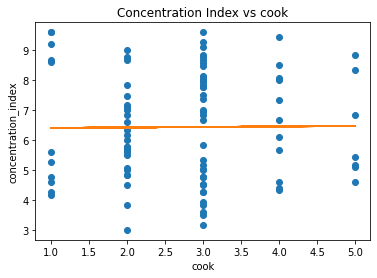

In [ ]:
# driver code 

file_path = "college_food_data.csv"
data_object = Analysis(file_path)
data_object.flow_control()
# data_object.print_df_columns()

independent_variable = "cook"
data_object.matplotlib_scatter_plot(independent_variable)
#data_object.altair_scatter_plot(independent_variable)


In [ ]:
import scipy.stats

result_table = []

result = scipy.stats.linregress(data_object.df['exercise'], data_object.df['concentration_index'])
result_table.append(result.slope)
result_table.append(result.intercept)
result_table.append(result.rvalue)
result_table.append(result.pvalue)
result_table.append(result.stderr)

print(result_table)


[nan, nan, nan, nan, nan]
